In [1]:
# install the newest development version of twi-xl-python.
pip install git+https://gitlab.com/twi-xl-surf-nl/twi-xl-python.git@73039c837dcce371c8ba4d25f1f7533f9763c954 --force-reinstall

  Cloning https://gitlab.com/twi-xl-surf-nl/twi-xl-python.git (to revision 73039c837dcce371c8ba4d25f1f7533f9763c954) to /private/var/folders/s_/wsb1rdqd3v73nj46sf886tn00000gq/T/pip-req-build-7v5_zs29
  Running command git clone --filter=blob:none --quiet https://gitlab.com/twi-xl-surf-nl/twi-xl-python.git /private/var/folders/s_/wsb1rdqd3v73nj46sf886tn00000gq/T/pip-req-build-7v5_zs29
  Running command git rev-parse -q --verify 'sha^73039c837dcce371c8ba4d25f1f7533f9763c954'
  Running command git fetch -q https://gitlab.com/twi-xl-surf-nl/twi-xl-python.git 73039c837dcce371c8ba4d25f1f7533f9763c954
  Running command git checkout -q 73039c837dcce371c8ba4d25f1f7533f9763c954
  Resolved https://gitlab.com/twi-xl-surf-nl/twi-xl-python.git to commit 73039c837dcce371c8ba4d25f1f7533f9763c954
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached furl-2.1.3-py2.py3-none-any.whl.metadata (1.2 kB)
  Using c

In [2]:
!/opt/homebrew/Cellar/jupyterlab/4.0.12/libexec/bin/python -m pip install --upgrade pip

In [3]:
from twixl.collections import twitter
from datetime import datetime
import twixl
import os

In [4]:
# Set development twi-xl api endpoint.
os.environ["TWIXL_API_ENDPOINT"] = "https://ftmgjhmifb.execute-api.eu-central-1.amazonaws.com/politics"
os.environ["TWIXL_API_KEY"] = "Ad39ewyYoakVZsz2qd6a0dBoKFnmZCX7EkV1334IvSs0"

In [5]:
#Create list of author id's
with open("./MPs_twitter_usernames.txt", "r") as f:
    authors = f.read().splitlines()

In [6]:
authors

['sybrandbuma',
 'swsjoerdsma',
 'erikziengs',
 'mvonmartels',
 'suzanne_GL',
 'keklikyucel',
 'HaykeVeldman',
 'jesseklaver',
 'HarmenKrul',
 'edgarmulder1',
 'SylvanaBIJ1',
 'Loesypma',
 'JHTerpstra',
 'RPlasterk',
 'Fonda_Sahla',
 'Yvonne_Bijenhof',
 'meilivos',
 'jobaCDA',
 'rikgrashoff',
 'KeesVee',
 'djeppink',
 'FemkeMerel',
 'amerkies',
 'RienvdVelde',
 'NicoleTemmink',
 'WassilaHachchi',
 'DonCeder',
 'barbara_visser1',
 'lilianhelderpvv',
 'sharon_dijksma',
 'RaoulBoucke',
 'SvVeldhoven',
 'ivanengelshoven',
 'StienekevdGraaf',
 'LisaGinneken',
 'Jeanetvdlaan',
 'sarahdobbe',
 'Matthijshuizing',
 'helmanepperus',
 'dbonis',
 'AgnesMulderCDA',
 'martijngrevink',
 'WBHoekstra',
 'JacquesMonasch',
 'yasemincegerek',
 'leendertdelange',
 'dijkhoff',
 'svanweyenberg',
 'Danai_PVV',
 'PieterOmtzigt',
 'kirstenvdhul',
 'kathalijne',
 'keesvdstaaij',
 'KoekkoekMarieke',
 'pedegro',
 'advocaatsmeets',
 'deliefde',
 'ZihniOzdil',
 'warmerdamd66',
 'jimmydijk',
 'leonievestering',
 'Fra

In [7]:
#Create a query to search tweets from listed authors.

# Only search politics dataset (i.e. dnpp Groningen archive and profile scraper)
query_authors_only_politics = (
    twitter.Query(
        dataset=twitter.dataset.POLITICS)
        .from_usernames(authors)
)
# Only search twinl dataset
query_authors_only_twinl = (
    twitter.Query(
        dataset=twitter.dataset.TWINL)
        .from_usernames(authors)
)
# Default is to search ALL archives (i.e. twinl and politics datasets)
query_authors = (
    twitter.Query()
        .from_usernames(authors)
)

In [8]:
query_authors.print()

{
    "query": [
        {
            "AND": {
                "from_usernames": "['sybrandbuma' OR 'swsjoerdsma' OR 'erikziengs' OR 'mvonmartels' OR 'suzanne_GL' OR 'keklikyucel' OR 'HaykeVeldman' OR 'jesseklaver' OR 'HarmenKrul' OR 'edgarmulder1' OR 'SylvanaBIJ1' OR 'Loesypma' OR 'JHTerpstra' OR 'RPlasterk' OR 'Fonda_Sahla' OR 'Yvonne_Bijenhof' OR 'meilivos' OR 'jobaCDA' OR 'rikgrashoff' OR 'KeesVee' OR 'djeppink' OR 'FemkeMerel' OR 'amerkies' OR 'RienvdVelde' OR 'NicoleTemmink' OR 'WassilaHachchi' OR 'DonCeder' OR 'barbara_visser1' OR 'lilianhelderpvv' OR 'sharon_dijksma' OR 'RaoulBoucke' OR 'SvVeldhoven' OR 'ivanengelshoven' OR 'StienekevdGraaf' OR 'LisaGinneken' OR 'Jeanetvdlaan' OR 'sarahdobbe' OR 'Matthijshuizing' OR 'helmanepperus' OR 'dbonis' OR 'AgnesMulderCDA' OR 'martijngrevink' OR 'WBHoekstra' OR 'JacquesMonasch' OR 'yasemincegerek' OR 'leendertdelange' OR 'dijkhoff' OR 'svanweyenberg' OR 'Danai_PVV' OR 'PieterOmtzigt' OR 'kirstenvdhul' OR 'kathalijne' OR 'keesvdstaaij' O

In [15]:
#Search twi-xl archive and download results
search_results = twitter.search(
    query=query_authors,
    start_time=datetime(2021, 1, 1, 0, 0),
    end_time=datetime(2021, 1, 10, 0, 0),
    callback=twitter.print_callback
)


Query status: RUNNING (0 Bytes scanned)
Query status: DOWNLOADING_RESULTS (2.9 GB scanned)


In [16]:
df = search_results.to_pandas()

In [17]:
#display first 10 rows
df.head(10)

,tweet_id,timestamp,text,full_text,hashtags,urls,source
0,1344988036476653569,2021-01-01 12:45:11,"Cultuur is geen entertainment, maar is essenti...","Cultuur is geen entertainment, maar is essenti...",[wienerphilharmoniker],[],dnpp
1,1345134529539960833,2021-01-01 22:27:17,RT @PieterOmtzigt: 'zwartjes' in mails van de ...,RT @PieterOmtzigt: 'zwartjes' in mails van de ...,[],[],dnpp
2,1346018461856780289,2021-01-04 08:59:43,RT @lindavvermeulen: Grafiek van de dag. Er zi...,RT @lindavvermeulen: Grafiek van de dag. Er zi...,[],[],dnpp
3,1346349194135695361,2021-01-05 06:53:56,1/4 Morgen moet het Amerikaanse Congres het re...,1/4 Morgen moet het Amerikaanse Congres het re...,[],[],dnpp
4,1346354032617660416,2021-01-05 07:13:10,RT @Machiavelli_NL: De #Machiavelliprijs 2020 ...,RT @Machiavelli_NL: De #Machiavelliprijs 2020 ...,[Machiavelliprijs],[],dnpp
5,1346389540236361728,2021-01-05 09:34:15,Leidinggevende Republikeinen over #Trump . Kij...,Leidinggevende Republikeinen over #Trump . Kij...,[Trump],[https://twitter.com/davidaxelrod/status/13462...,dnpp
6,1346450643708489728,2021-01-05 13:37:03,RT @Victorfpak: Bijna 300.000 vaccins zijn dez...,RT @Victorfpak: Bijna 300.000 vaccins zijn dez...,[],[],dnpp
7,1346541245443805189,2021-01-05 19:37:05,"RT @humanverbond: Zara Kay, ex-moslim en vrouw...","RT @humanverbond: Zara Kay, ex-moslim en vrouw...",[],[],dnpp
8,1346739272485892097,2021-01-06 08:43:58,Dit is 1! https://t.co/9FR2bU2ICk,Dit is 1! https://t.co/9FR2bU2ICk,[],[https://twitter.com/nbcnews/status/1346710425...,dnpp
9,1346931033938137091,2021-01-06 21:25:57,Het punt is dat die Qanon-aanhangers op het Ca...,Het punt is dat die Qanon-aanhangers op het Ca...,[],[https://twitter.com/Victorfpak/status/1346929...,dnpp


<Axes: >

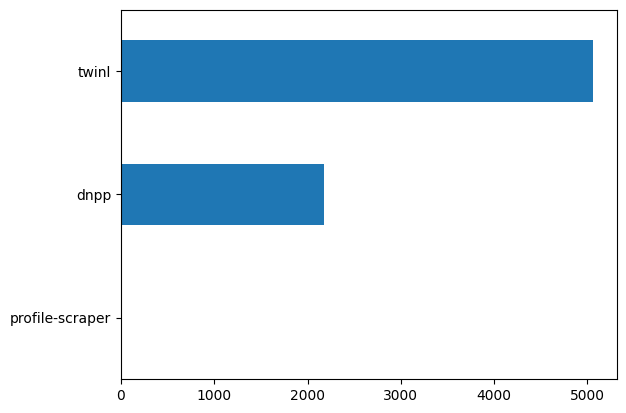

In [18]:
# Plot the number of tweets from different datasets.
df.source.value_counts().sort_values().plot(kind = 'barh')

In [19]:
# check&count duplicates between datasets
df['is_duplicated'] = df.duplicated(["tweet_id"])
df['is_duplicated'].sum()

1733

In [22]:
#show duplicates
df[df['is_duplicated']].head(25)

,tweet_id,timestamp,text,full_text,hashtags,urls,source,is_duplicated
52,1344947292281962496,2021-01-01 10:03:17,Rutte faciliteerde in het geniep jihadisten en...,Rutte faciliteerde in het geniep jihadisten en...,[],[https://www.nrc.nl/nieuws/2020/12/30/rutte-fa...,dnpp,True
66,1345663594235621377,2021-01-03 08:29:36,RT @WybrenvanHaga: Teken deze petitie om aanda...,,[],[],twinl,True
277,1345324674994106368,2021-01-02 11:02:52,RT @chr_weijts: Over wilskracht en waarom goed...,RT @chr_weijts: Over wilskracht en waarom goed...,[],[https://www.nrc.nl/nieuws/2020/12/29/waar-een...,dnpp,True
334,1345348594761666560,2021-01-02 12:37:55,Op voorstel van @groenlinks en @PartijvdDieren...,Op voorstel van @groenlinks en @PartijvdDieren...,[vuurwerkverbod],[],dnpp,True
392,1347833871589638144,2021-01-09 08:13:31,RT @NOS: PVV wil terug naar land zonder hoofdo...,,[],[https://nos.nl/l/2363627],twinl,True
393,1347963423070498819,2021-01-09 17:48:18,RT @In een serie interviews met @oogopmorgen b...,RT @In een serie interviews met @oogopmorgen b...,[],"[""https://twitter.com/wkoolmees/status/1347963...",profile-scraper,True
398,1345379261465690112,2021-01-02 14:39:46,RT @ditIsInhoud: Boeren verdienen eerlijke pri...,RT @ditIsInhoud: Boeren verdienen eerlijke pri...,[],[],dnpp,True
452,1347458612600463361,2021-01-08 07:22:22,RT @PieterOmtzigt: de Kamer heeft zeer preciez...,,[],[],twinl,True
468,1346118742024007685,2021-01-04 15:38:12,RT @D66: De documentaire ‘Sigrid Kaag: van Bei...,RT @D66: De documentaire ‘Sigrid Kaag: van Bei...,[kijktip],[],dnpp,True
475,1346866042166009857,2021-01-06 17:07:42,RT @tomjanmeeus: Nog nooit verloren Republikei...,RT @tomjanmeeus: Nog nooit verloren Republikei...,[],[],dnpp,True


In [24]:
#example of duplicate
df[df['tweet_id'] == '1344947292281962496']

,tweet_id,timestamp,text,full_text,hashtags,urls,source,is_duplicated
15,1344947292281962496,2021-01-01 09:03:17,Rutte faciliteerde in het geniep jihadisten en...,,[],[https://www.nrc.nl/nieuws/2020/12/30/rutte-fa...,twinl,False
52,1344947292281962496,2021-01-01 10:03:17,Rutte faciliteerde in het geniep jihadisten en...,Rutte faciliteerde in het geniep jihadisten en...,[],[https://www.nrc.nl/nieuws/2020/12/30/rutte-fa...,dnpp,True
